In [1]:

import tensorflow as tf
print(tf.__version__)

2.0.0


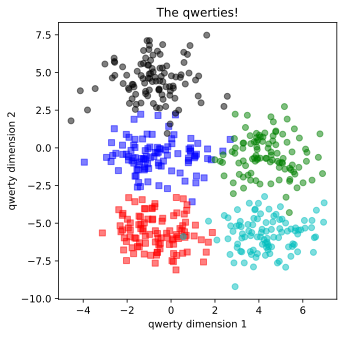

In [2]:
import numpy as np

from jagpascoe_ML_toolkit.createDataFunctions import createQwerties, splitData, plot_classModelDecisionMap
data, labels = createQwerties(clusters=5, nPerClust=100, blur=1.20, centroids=np.array([[0,0],[0,5],[0,-5],[5,0],[5,-5]]), draw=True)
#data, labels = createQwerties(clusters=2, nPerClust=100, blur=1.20, centroids=np.array([[0,0],[0,5]]), draw=True)
data = data.numpy()
labels=labels.numpy()               

In [3]:
import copy
l2=np.zeros(shape=(labels.size,5))
for i in range(labels.size):
    l2[i,labels[i]]=1

labels=copy.deepcopy(l2)


In [4]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
    ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history=model_1.fit(data, labels, epochs=20)

model_1.evaluate(data, labels)

2022-10-06 15:28:16.943268: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 15:28:16.943807: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 500 samples
Epoch 1/20
500/500 [==============================] - 2s 4ms/sample - loss: 1.6492 - accuracy: 0.2760
Epoch 2/20
500/500 [==============================] - 0s 96us/sample - loss: 0.9146 - accuracy: 0.6220
Epoch 3/20
500/500 [==============================] - 0s 88us/sample - loss: 0.6879 - accuracy: 0.7540
Epoch 4/20
500/500 [==============================] - 0s 91us/sample - loss: 0.5416 - accuracy: 0.8940
Epoch 5/20
500/500 [==============================] - 0s 84us/sample - loss: 0.4019 - accuracy: 0.9120
Epoch 6/20
500/500 [==============================] - 0s 82us/sample - loss: 0.2922 - accuracy: 0.9320
Epoch 7/20
500/500 [==============================] - 0s 84us/sample - loss: 0.2355 - accuracy: 0.9400
Epoch 8/20
500/500 [==============================] - 0s 84us/sample - loss: 0.2028 - accuracy: 0.9420
Epoch 9/20
500/500 [==============================] - 0s 84us/sample - loss: 0.1803 - accuracy: 0.9460
Epoch 10/20
500/500 [==============================] 

[0.10911949443817139, 0.968]

In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  24        
_________________________________________________________________
dense_1 (Dense)              multiple                  45        
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

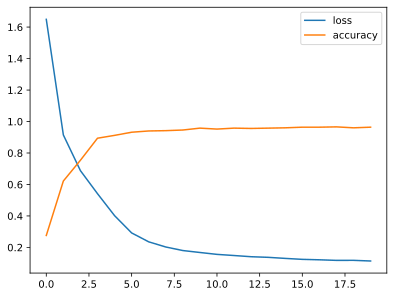

In [6]:
import pandas as pd
pd.DataFrame(history.history).plot()

doing multiclass classification...


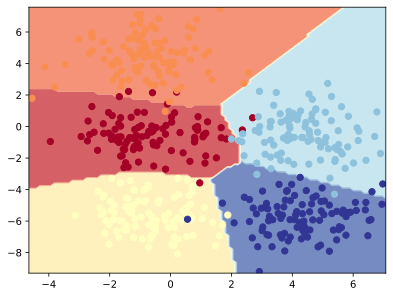

In [7]:
plot_classModelDecisionMap(model=model_1, X=data, y=labels)